In [35]:
import pandas as pd
import numpy as np
import matplotlib as mt
import glob
import pyranges as pr
from pyranges import PyRanges
from io import StringIO
import numpy
import os
os.chdir('/Users/robin.burns/Documents/012TransposableElements/002PCRArtifacts')
files = glob.glob("*.teinsertions.bed")
print(files)

alltogether = []

for f in files:
    mytes=pd.read_csv(f, header=None, index_col=None)
    alltogether.append(mytes)

myframe = pd.concat(alltogether, axis=0, ignore_index=True)
myframe.head(n=5)

['9412_pcrfree.teinsertions.bed', '9917_pcrfree.teinsertions.bed', '9888.teinsertions.bed', '6069_pcrfree.teinsertions.bed', '9888_pcrfree.teinsertions.bed', '6184.teinsertions.bed', '9917.teinsertions.bed', '8242.teinsertions.bed', '6024.teinsertions.bed', '9559_pcrfree.teinsertions.bed', '6966.teinsertions.bed', '9412.teinsertions.bed', '8242_pcrfree.teinsertions.bed', '6191_pcrfree.teinsertions.bed', '9452.teinsertions.bed', '6969.teinsertions.bed', '6191.teinsertions.bed', '6966_pcrfree.teinsertions.bed', '9452_pcrfree.teinsertions.bed', '9559.teinsertions.bed', '6124_pcrfree.teinsertions.bed', '6124.teinsertions.bed', '6046.teinsertions.bed', '6046_pcrfree.teinsertions.bed', '6024_pcrfree.teinsertions.bed', '6069.teinsertions.bed', '6969_pcrfree.teinsertions.bed', '6104_pcrfree.teinsertions.bed', '6104.teinsertions.bed', '6184_pcrfree.teinsertions.bed']


,0,1,2,3,4
0,Chr1,81463,81464,DNA_DNA,9412_pcrfree
1,Chr1,82308,82309,DNA_DNA,9412_pcrfree
2,Chr1,89846,89847,DNA_MuDR,9412_pcrfree
3,Chr1,93109,93110,LTR_Copia,9412_pcrfree
4,Chr1,99055,99056,RC_Helitron,9412_pcrfree


In [36]:
#myframe.drop(0, axis=1, inplace=True)
myframe[0]=pd.Categorical(myframe[0],categories=['Chr1', 'Chr2', 'Chr3', 'Chr4', 'Chr5', 'ChrC','ChrM'])
myframe2=myframe.sort_values([0, 2])
myframe2=myframe2.reset_index()


In [37]:
myframe2.columns = ['index','Chromosome','Start','End',
                     'TEfamily','acc']
myframe3=myframe2[['Chromosome','Start','End',
                     'TEfamily','acc']]

myframe3.head(n=5)


,Chromosome,Start,End,TEfamily,acc
0,Chr1,81462,81463,DNA_DNA,6046_pcrfree
1,Chr1,81462,81463,DNA_DNA,6024_pcrfree
2,Chr1,81463,81464,DNA_DNA,9412_pcrfree
3,Chr1,81466,81467,DNA_DNA,9452
4,Chr1,81467,81468,DNA_DNA,9888_pcrfree


In [38]:
myframe3=PyRanges(myframe3)
myframe3.head(n=5)
print(myframe3)

+--------------+-----------+-----------+------------+--------------+
| Chromosome   | Start     | End       | TEfamily   | acc          |
| (category)   | (int32)   | (int32)   | (object)   | (object)     |
|--------------+-----------+-----------+------------+--------------|
| Chr1         | 81462     | 81463     | DNA_DNA    | 6046_pcrfree |
| Chr1         | 81462     | 81463     | DNA_DNA    | 6024_pcrfree |
| Chr1         | 81463     | 81464     | DNA_DNA    | 9412_pcrfree |
| Chr1         | 81466     | 81467     | DNA_DNA    | 9452         |
| ...          | ...       | ...       | ...        | ...          |
| ChrM         | 511129    | 511130    | LTR_Gypsy  | 6046_pcrfree |
| ChrM         | 511129    | 511130    | LTR_Gypsy  | 6024_pcrfree |
| ChrM         | 511469    | 511470    | DNA_DNA    | 9412         |
| ChrM         | 511587    | 511588    | DNA_DNA    | 9412_pcrfree |
+--------------+-----------+-----------+------------+--------------+
Unstranded PyRanges object has 630

In [47]:
#Check if 2000 is too much on IGV
#grtest=myframe3.cluster(strand=None, by='TEfamily', slack=-1, count=False, nb_cpu=1)
gr1=myframe3.cluster(strand=None, by='TEfamily', slack=5000, count=False, nb_cpu=1)

In [48]:
#gr1.head(n=5)
#grtest.to_bed('Pop.clustered.mergedTEST.bed')
gr1.to_bed('Pop.clustered.merged.bed')
gr2=pd.read_csv('Pop.clustered.merged.bed', header=None, sep='\t')
print(gr2.head(n=5))
gr2=gr2[[0,1,2,6,7,8]]
gr2.head(n=5)

      0      1      2  3  4  5        6  7             8
0  Chr1  81462  81463  .  .  .  DNA_DNA  1  6046_pcrfree
1  Chr1  81462  81463  .  .  .  DNA_DNA  1  6024_pcrfree
2  Chr1  81463  81464  .  .  .  DNA_DNA  1  9412_pcrfree
3  Chr1  81466  81467  .  .  .  DNA_DNA  1          9452
4  Chr1  81467  81468  .  .  .  DNA_DNA  1  9888_pcrfree


,0,1,2,6,7,8
0,Chr1,81462,81463,DNA_DNA,1,6046_pcrfree
1,Chr1,81462,81463,DNA_DNA,1,6024_pcrfree
2,Chr1,81463,81464,DNA_DNA,1,9412_pcrfree
3,Chr1,81466,81467,DNA_DNA,1,9452
4,Chr1,81467,81468,DNA_DNA,1,9888_pcrfree


In [49]:
#Take median of cluster 
ans = gr2.groupby(7) \
       .agg({0:'unique',1:'median', 6:'unique', 8:'unique'}) \
       .reset_index()
ans.head(n=5)
#Fix formattng
ans[0] = ans[0].str[0]
ans[6] = ans[6].str[0]
ans[1] = ans[1].astype(int)
ans[7] = ans[7].astype(str)
ans[8] = ans[8].astype(str)
ans[8] =  ans[8].apply(lambda x: x.replace('[','').replace(']','')) 
ans[8] =  ans[8].apply(lambda x: x.replace("\'","")) 
ans[2]=ans[1]+1
ans=ans[[0,1,2,6,8]]
ans.columns = ['Chromosome','Start','End',
                     'TEfamily','acc']
ans.head(n=5)

,Chromosome,Start,End,TEfamily,acc
0,Chr1,81486,81487,DNA_DNA,6046_pcrfree 6024_pcrfree 9412_pcrfree 9452 98...
1,Chr1,230743,230744,DNA_DNA,6184
2,Chr1,314503,314504,DNA_DNA,6104
3,Chr1,397498,397499,DNA_DNA,9559_pcrfree 6124_pcrfree 8242 8242_pcrfree 61...
4,Chr1,672076,672077,DNA_DNA,6184


In [50]:
ans=ans.sort_values(['Chromosome', 'Start'])

ans=ans.reset_index()
ans.head(n=5)

,index,Chromosome,Start,End,TEfamily,acc
0,0,Chr1,81486,81487,DNA_DNA,6046_pcrfree 6024_pcrfree 9412_pcrfree 9452 98...
1,1521,Chr1,82321,82322,DNA_Mariner,9917 9917_pcrfree
2,5577,Chr1,83886,83887,RC_Helitron,9452 9452_pcrfree
3,1580,Chr1,89780,89781,DNA_MuDR,6046_pcrfree 6024_pcrfree 6969_pcrfree 9452 94...
4,1332,Chr1,89798,89799,DNA_Harbinger,6184 9559_pcrfree 6104 6969_pcrfree 6104_pcrfr...


In [51]:
#Turn acc into string of 1 and 0s by if the value is present in the list of file names
files = glob.glob("*.teinsertions.bed")
#print(files)

files2=files

f2=[item.replace(".teinsertions.bed", "") for item in files2]
#print(f2)
#type(f2)
f2.sort()

print(f2)
mynames=f2

out=open('Pop.clustered.merged.PA.bed', 'w')
out.write('%s,%s,%s,%s,%s\n'%('Chromosome','Start','End','TEfamily', ",".join(mynames)))
for index, row in ans.iterrows():
    myacc=str(row['acc'])
    myacc=myacc.split(' ')
    myacc=list(map(lambda x:x.strip(),myacc))
    #print(myacc)
    mypa = ','.join('01'[f in myacc] for f in f2) #presence absence
    #print(mypa)
    #break
    mynames=f2
    out.write('%s,%s,%s,%s,%s\n'%(row['Chromosome'], row['Start'], row['End'], row['TEfamily'], mypa))
out.close()

['6024', '6024_pcrfree', '6046', '6046_pcrfree', '6069', '6069_pcrfree', '6104', '6104_pcrfree', '6124', '6124_pcrfree', '6184', '6184_pcrfree', '6191', '6191_pcrfree', '6966', '6966_pcrfree', '6969', '6969_pcrfree', '8242', '8242_pcrfree', '9412', '9412_pcrfree', '9452', '9452_pcrfree', '9559', '9559_pcrfree', '9888', '9888_pcrfree', '9917', '9917_pcrfree']


In [52]:
mypop=pd.read_csv('Pop.clustered.merged.PA.bed', header=0)
mypop.head(n=5)

,Chromosome,Start,End,TEfamily,6024,6024_pcrfree,6046,6046_pcrfree,6069,6069_pcrfree,...,9412,9412_pcrfree,9452,9452_pcrfree,9559,9559_pcrfree,9888,9888_pcrfree,9917,9917_pcrfree
0,Chr1,81486,81487,DNA_DNA,0,1,0,1,1,1,...,1,1,1,1,0,1,0,1,1,1
1,Chr1,82321,82322,DNA_Mariner,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,Chr1,83886,83887,RC_Helitron,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,Chr1,89780,89781,DNA_MuDR,1,1,0,1,1,1,...,1,1,1,1,1,1,0,0,0,0
4,Chr1,89798,89799,DNA_Harbinger,0,1,0,1,0,1,...,0,0,0,0,0,1,0,1,0,1


In [53]:
#mypop["sfs"] = mypop[[4:-1]].sum(axis=1)
column_list = list(mypop)
column_list = column_list[4:]
mypop['sfs'] = mypop[column_list].sum(axis=1)
mypop_mask=mypop['sfs']==0
filtered_mypop = mypop[mypop_mask]
mypop.head(n=5)

,Chromosome,Start,End,TEfamily,6024,6024_pcrfree,6046,6046_pcrfree,6069,6069_pcrfree,...,9412_pcrfree,9452,9452_pcrfree,9559,9559_pcrfree,9888,9888_pcrfree,9917,9917_pcrfree,sfs
0,Chr1,81486,81487,DNA_DNA,0,1,0,1,1,1,...,1,1,1,0,1,0,1,1,1,24
1,Chr1,82321,82322,DNA_Mariner,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2
2,Chr1,83886,83887,RC_Helitron,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,2
3,Chr1,89780,89781,DNA_MuDR,1,1,0,1,1,1,...,1,1,1,1,1,0,0,0,0,18
4,Chr1,89798,89799,DNA_Harbinger,0,1,0,1,0,1,...,0,0,0,0,1,0,1,0,1,17


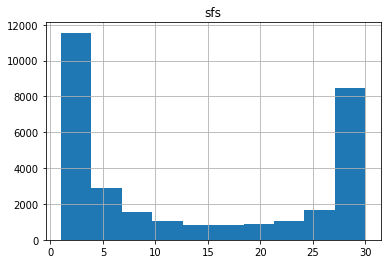

In [54]:
mypop.hist("sfs")
mypop.to_csv('Pop.clustered.merged.PA.bed', header=True)

In [ ]:
#check if singletons are real or not in R